3) Com base nos dados públicos da série histórica climática no arquivo “Dados_climaticos_historicos.xlsx”, aba da 
cidade  Macaé,  monte  um  arquivo  ASCII  (txt)  organizado  em  colunas  de  dados:  meses,  temperaturas  mínima, 
máxima e média. Após, use o comando open para realizar a leitura de dados, a fim de instanciar 4 listas: uma com 
os 12 meses, e as outras para as temperaturas mínima, máxima e média. Em seguida, demonstre: como montar um 
dicionário  de  dados  formado  a  partir  destas  4  listas,  exibindo  seu  conteúdo;  e,  depois  como  fazer  para  exibir  a 
temperatura média do mês de julho. Por fim, realize um plot (gráfico cartesiano) mostrando todas as temperaturas 
nos meses.  
> Objetiva técnicas de leitura de arquivo ASCII, listas (list), dicionários (data dictionary) e geração de gráfico cartesiano 
simples (plot).

## 1. Importação das Bibliotecas

Nesta etapa, vamos importar a biblioteca `pandas`, que é essencial para manipulação e análise de dados em Python.

In [58]:
#importando bibliotecas utilizadas nessa análise
import pandas as pd
import matplotlib.pyplot as plt


## 2. Limpeza e Processamento

* Ler a planilha específica do arquivo Excel.
* Ignorar o cabeçalho informativo.
* Selecionar apenas as métricas de interesse.
* Transpor a tabela para que os meses se tornem linhas.
* Renomear as colunas para nomes mais limpos e padronizados.

In [59]:
df = pd.read_excel(
    "../Dados_climaticos_historicos.xlsx", 
    sheet_name="Historico_Clima_Macae", 
    skiprows=3,
    index_col=0,
    engine="openpyxl"
)

df = df.iloc[:3, :]
# 2. Transpor o DataFrame.
df_transposto = df.T

# 3. Limpar e renomear as colunas para nomes mais simples.
df_transposto.columns = [
    "Media_Temp_C", 
    "Minima_Temp_C", 
    "Maxima_Temp_C", 
]


print("Processamento concluído com sucesso!")

Processamento concluído com sucesso!


## 3. Resultado Final

Por fim, a tabela consolidada é exibida e salva em um arquivo CSV para uso futuro.

In [60]:
# (Código para salvar e imprimir o df_final)
print(df_transposto)
csv_nome = "dados_climaticos_limpos.csv"
df_transposto.to_csv(csv_nome, index=False)

           Media_Temp_C  Minima_Temp_C  Maxima_Temp_C
Janeiro            25.8           23.5           29.1
Fevereiro          26.0           23.6           29.5
Março              25.5           23.3           28.5
Abril              24.1           21.9           27.1
Maio               22.0           19.6           25.0
Junho              21.2           18.5           24.5
Julho              20.7           17.9           24.2
Agosto             21.0           18.3           24.7
Setembro           21.8           19.2           25.5
Outubro            22.9           20.5           26.4
Novembro           23.5           21.4           26.5
Dezembro           24.9           22.7           28.0


Dicionário de temperaturas:
{'meses': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], 'temperatura_media': [25.8, 26.0, 25.5, 24.1, 22.0, 21.2, 20.7, 21.0, 21.8, 22.9, 23.5, 24.9], 'temperatura_minima': [23.5, 23.6, 23.3, 21.9, 19.6, 18.5, 17.9, 18.3, 19.2, 20.5, 21.4, 22.7], 'temperatura_maxima': [29.1, 29.5, 28.5, 27.1, 25.0, 24.5, 24.2, 24.7, 25.5, 26.4, 26.5, 28.0]}

A temperatura média em Julho foi: 20.7°C


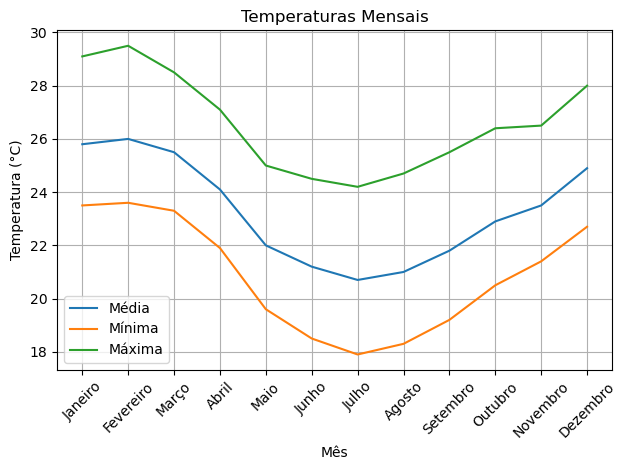

In [62]:
temp_media = []
temp_minima = []
temp_maxima = []
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
         'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Abre o arquivo para leitura
with open('dados_climaticos_limpos.csv', 'r') as f:
    # Pula a primeira linha (cabeçalho)
    next(f)
    # Itera sobre as linhas restantes do arquivo
    for line in f:
        # Separa os valores de cada linha
        media, minima, maxima = line.strip().split(',')
        # Adiciona os valores às listas correspondentes
        temp_media.append(float(media))
        temp_minima.append(float(minima))
        temp_maxima.append(float(maxima))

# Cria o dicionário com os dados
dados_temperatura = {
    'meses': meses,
    'temperatura_media': temp_media,
    'temperatura_minima': temp_minima,
    'temperatura_maxima': temp_maxima
}

# Imprime o dicionário
print("Dicionário de temperaturas:")
print(dados_temperatura)

# Encontra e imprime a temperatura média de julho
indice_julho = meses.index('Julho')
media_julho = temp_media[indice_julho]
print(f"\nA temperatura média em Julho foi: {media_julho}°C")

# Configura e gera o gráfico
plt.plot(meses, temp_media, label='Média')
plt.plot(meses, temp_minima, label='Mínima')
plt.plot(meses, temp_maxima, label='Máxima')
plt.xlabel('Mês')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas Mensais')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Salva o gráfico como imagem
plt.savefig('temperaturas_mensais.png')